In [26]:
from fastai.vision import *
import torch
from torchember.core import torchEmber
from tensorflow.keras.datasets import mnist
from torch.utils.data import DataLoader

In [42]:
path = untar_data(URLs.MNIST)

In [44]:
il = ImageList.from_folder(path, convert_mode='L')
defaults.cmap='binary'

In [45]:
sd = il.split_by_folder(train='training', valid='testing')

In [46]:
ll = sd.label_from_folder()

In [47]:
x,y = ll.train[0]

9 torch.Size([1, 28, 28])


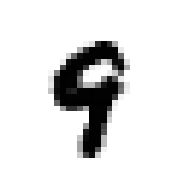

In [48]:
x.show()
print(y,x.shape)

In [49]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [50]:
ll = ll.transform(tfms)

In [51]:
bs = 128

In [52]:
data = ll.databunch(bs=bs).normalize()

In [53]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [54]:
model = nn.Sequential(
    conv(1, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [55]:
te=torchEmber(model)

start analyzing model


In [57]:
learn = Learner(data, te.model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)